QUESTÃO 1 (AV2 - PARTE 1)

In [1]:
import numpy as np
import matplotlib.pyplot as mtp


In [2]:
tamArq = np.array([10, 50, 100, 500, 1000, 5000, 10000])
tamTempo = np.array([3.8, 8.1, 11.9, 55.6, 99.6, 500.2, 1006.1])

print(tamArq)
print(tamTempo)

[   10    50   100   500  1000  5000 10000]
[   3.8    8.1   11.9   55.6   99.6  500.2 1006.1]


[]

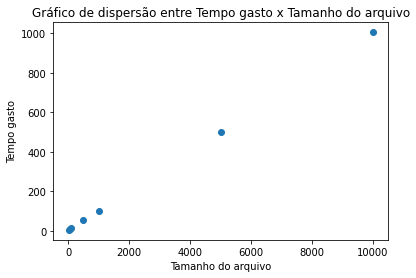

In [3]:
mtp.scatter(tamArq, tamTempo)

mtp.title("Gráfico de dispersão entre Tempo gasto x Tamanho do arquivo")
mtp.xlabel("Tamanho do arquivo")
mtp.ylabel("Tempo gasto")
mtp.plot()

Agora precisamos calcular a reta de regressão.
y = A + Bx

In [4]:
#y = A + Bx
#calcular Sxx
#Soma de X
i = 0
auxSomaSxx = 0
auxSomaSxx2 = 0
while i < tamArq.__len__():
    auxSomaSxx = auxSomaSxx + (tamArq[i]**2)
    auxSomaSxx2 = auxSomaSxx2 + tamArq[i]
    i = i + 1
Sxx = auxSomaSxx - (((auxSomaSxx2)**2)/tamArq.__len__()) 


print(Sxx)

86611800.0


In [5]:
#Syy
#Soma de y
i = 0

auxSomaSyy = 0
auxSomaSyy2 = 0
while i < tamTempo.__len__():
    auxSomaSyy = auxSomaSyy + (tamTempo[i]**2)
    auxSomaSyy2 = auxSomaSyy2 + tamTempo[i]
    i = i + 1
Syy = auxSomaSyy - (((auxSomaSyy2)**2)/tamTempo.__len__())

print(Syy)

869922.4171428572


In [6]:
#Sxy
#Soma conjunta de x e y
i = 0

auxSomaSxy = 0
auxSomaSxy2 = auxSomaSxx2 * auxSomaSyy2
while i < tamArq.__len__():
    auxSomaSxy = auxSomaSxy + (tamArq[i]*tamTempo[i])
    
    i = i + 1

Sxy = auxSomaSxy - ((auxSomaSxy2)/tamTempo.__len__())

print(Sxy)

8680019.0


Após calcularmos as somas vamos calcular a função y = a + bx
Sabemos que: a = y - bx

In [7]:
#calcular b
b = Sxy/Sxx

print(b)

0.10021751077797714


O número gerado para b é muito pequeno, pois o módulo do tempo (eixo y) é muito menor que o módulo do tamanho do arquivo.

In [8]:
#calcular a:
y = tamTempo.mean()   #[int((tamTempo.__len__()/2))]
x = tamArq.mean()     #[int((tamArq.__len__()/2))]

a = y - b*x
print("Média de y:", y)
print("Média de x:", x)
print(a)

Média de y: 240.7571428571429
Média de x: 2380.0
2.239467205557304


In [9]:
y = a + b*x



xK = tamArq[tamArq.__len__()-1]
#para teste
y = a + b*xK
print("y quando o x está na operação 7: ", y)

y = a + b*x


y quando o x está na operação 7:  1004.4145749853286


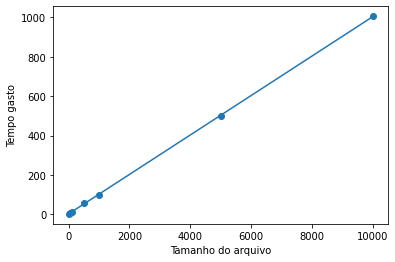

In [10]:
xAux = np.linspace(0, 10000, 100)
##Nessa linha fazemos o x ser uma serie de números para conseguirmos colocar 
##a reta y = a + b*x

mtp.scatter(tamArq, tamTempo)
mtp.xlabel("Tamanho do arquivo")
mtp.ylabel("Tempo gasto")
mtp.plot(xAux, a + b*xAux)

#Aqui colocamos a reta no gráfico de dispersão


Feito tudo isso, conseguimos calcular o modelo de regressão.
Agora, vamos calcular a correlação.

In [11]:
#Correlação 
# r = (Sxy)/((Sxx*Syy)**(1/2))


r = (Sxy)/((Sxx*Syy)**(1/2))

print("A Correlação entre as váriaveis é: ", r)

A Correlação entre as váriaveis é:  0.9999813088152537


Praticamente a Correlação é perfeita e positiva. Uma vez que 0,99997 é muito próximo de 1.

Feito isso, vamos calcular o intervalo de confiança dessa tabela.

In [12]:
##Intervalos de confiança
n = tamTempo.__len__()
s2 = (Syy - b*Sxy)/(tamTempo.__len__()-2)

print(s2)
##Descobrir a t de student
##usando alfa = 0.05
alfa = 0.05
tAux1 = 1 - (alfa/2)
tAux2 = n - 2


##Parametros para descobrir a t de student
print(tAux1, tAux2)




t =  2.571  #4.773
print("T de student usada: ", t)


b1 = b - (t*s2)/((n*Sxx)**1/2)
b2 = b + (t*s2)/((n*Sxx)**1/2)
print("intervalo de confiança de b")
print("(", b1,";", b2, ")")



a1 = a - ((t*s2)*(auxSomaSxx**1/2))/((n*Sxx)**1/2)
a2 = a + ((t*s2)*(auxSomaSxx**1/2))/((n*Sxx)**1/2)
print("intervalo de confiança de a")
print("(", a1,";", a2, ")")


#fazer as formulas para y1 e y2
#No caso, esse intevalo vai mudar para cada valor de x e portanto, de y.
y1p = y - (t*s2)*((1+ (1/n)+((x-tamArq.mean()**2)/Sxx))**1/2)
y2p = y + (t*s2)*((1+ (1/n)+((x-tamArq.mean()**2)/Sxx))**1/2)
print("intervalo de confiança da função")
print("(", y1p,";", y2p, ")")


6.503891462180763
0.975 5
T de student usada:  2.571
intervalo de confiança de b
( 0.10021745561721564 ; 0.10021756593873864 )
intervalo de confiança de a
( -1.2429033767541253 ; 5.721837787868733 )
intervalo de confiança da função
( 231.74855950776978 ; 249.765726206516 )
